*Initial attempt at working with the fairy tale "Hansel and Gretel" and implementing it in code.*
*Based on the "Hansel and Gretel" word document.*

This implementation focuses on the "path-finding" algorithm used by Hansel.

### Extracted Story

Hansel and Gretel were scared. They knew the forest was deep and dark, and that it was easy to get lost.
"Don't worry! I have a plan!" whispered Hansel to Gretel. He went to the back of the house and filled his pockets with white pebbles from the garden.
Then the two children started walking, following their stepmother’s directions. Every few steps, Hansel dropped a little white pebble on the ground.
...
Hansel waited until the moon was bright. The moonlight shone through the tall trees and made his tiny white pebbles glow. They followed the trail of pebbles all the way back home.

### User Stories
...

### Assumptions

* Pebbles are not necessarily placed in a straight line.

### Design Decisions
...

In [1]:
import random
import math

RADIUS = 15

def get_random_point(radius, centerX, centerY):
    # https://stackoverflow.com/a/50746409
    r = radius * math.sqrt(random.random())
    theta = random.random() * 2 * math.pi
    return centerX + r * math.cos(theta), centerY + r * math.sin(theta)
    

def gen_random_walk(origin, end, radius):
    points = []
    distance = math.dist(origin, end)
    last_point = origin

    while distance > radius:
        new_point = get_random_point(radius, *last_point)
        dist = math.dist(new_point, end)
        
        while dist >= distance:
            new_point = get_random_point(radius, *last_point)
            dist = math.dist(new_point, end)

        distance = dist
        last_point = new_point
        points.append(new_point)

    return [origin, *points, end]


def check_visibility(points, view_distance):
    vis = {}
    
    for p1 in points:
        visible = []
        
        for p2 in points:
            if p1 == p2:
                continue
            
            if math.dist(p1, p2) <= view_distance:
                visible.append(p2)
        
        vis[p1] = visible
    
    return vis

In [2]:
class Pebble():
    def __init__(self, position, visited=False):
        self.pos = position
        self.visited = visited
    
    def __repr__(self):
        return f'<Pebble {self.pos}>'

(100, 100)
trying pebble <Pebble (90.6640453616828, 99.99480770003481)>
... ok
(90.6640453616828, 99.99480770003481)
trying pebble <Pebble (77.71187026949784, 97.00107205522725)>
... ok
(77.71187026949784, 97.00107205522725)
trying pebble <Pebble (63.10280285116744, 99.30997235443877)>
... ok
(63.10280285116744, 99.30997235443877)
trying pebble <Pebble (53.087953194124395, 95.51029315823916)>
... ok
(53.087953194124395, 95.51029315823916)
trying pebble <Pebble (52.22497676988591, 82.16405551358821)>
... ok
(52.22497676988591, 82.16405551358821)
trying pebble <Pebble (48.11902794769601, 73.22106247656588)>
... ok
(48.11902794769601, 73.22106247656588)
trying pebble <Pebble (45.72419975262818, 64.70554599055852)>
... ok
(45.72419975262818, 64.70554599055852)
trying pebble <Pebble (48.12132598028282, 53.56758058502994)>
... ok
(48.12132598028282, 53.56758058502994)
trying pebble <Pebble (55.807009706098356, 40.90456484765685)>
... ok
(55.807009706098356, 40.90456484765685)
trying pebble <

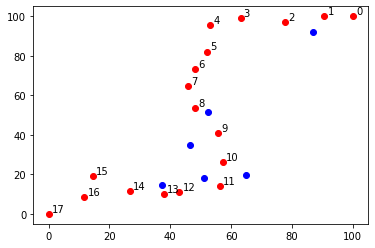

In [12]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    
    pts = gen_random_walk((0, 0), (100, 100), RADIUS)
    vis = check_visibility(pts, RADIUS)

    pebble_map = {pos: Pebble(pos) for pos in pts}
    vis = {pebble_map[x]: [pebble_map[y] for y in vis[x]] for x in vis}
    
    start_point = [p for p in pebble_map.values() if p.pos == (100, 100)][0]
    start_point.visited = True
    
    path = [start_point.pos]
    current_pebble = start_point
    
    while current_pebble.pos != (0, 0):
        print(f'{current_pebble.pos}')
        
        next_pebble = None
        
        for pebble in vis[current_pebble]:
            print(f'trying pebble {pebble}')
            
            if not pebble.visited:
                print('... ok')
                next_pebble = pebble
                break
        
        if next_pebble is None:
            print('Exhausted pebbles')
            break
        else:
            current_pebble = next_pebble
            current_pebble.visited = True
            path.append(current_pebble.pos)
    
    fig, ax = plt.subplots()
    
    for p in pts:
        if p in path:
            plt.plot(*p, 'ro')
            ax.annotate(path.index(p), (p[0] + 1, p[1] + 1))
        else:
            plt.plot(*p, 'bo')